### Financial Analytics Final Project
#### Team Members: Mrinal Saraswat, Mukta Pathak, Radhika Khurana, Sagaljyot Singh

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
ticker = ['PBR-A','BCE','ET','CQP','VALE']

In [7]:
df = yf.download(ticker, period = '10y')

[*********************100%%**********************]  5 of 5 completed


In [64]:
df.head()

Adj Close                                                Close  \
                  BCE        CQP        ET      PBR-A      VALE        BCE   
Date                                                                         
2013-12-09  26.878967  15.711536  8.697341  13.374010  8.908427  44.009998   
2013-12-10  26.866762  15.701038  8.920591  13.572410  8.839237  43.990002   
2013-12-11  26.726290  15.548754  8.799663  12.923098  8.574002  43.759998   
2013-12-12  26.515989  15.007877  8.867102  13.040335  8.522108  42.869999   
2013-12-13  26.410833  14.703312  9.062443  13.437136  8.458684  42.700001   

                                                ...       Open             \
                  CQP         ET  PBR-A   VALE  ...        BCE        CQP   
Date                                            ...                         
2013-12-09  29.920000  18.700001  14.83  15.45  ...  43.660000  29.620001   
2013-12-10  29.900000  19.180000  15.05  15.33  ...  44.009998  30.000000   
2013-12-11  29.610001  18.920000  14.33  14.87  ...  44.090000  29.990000   
2013-12-12  28.580000  19.065001  14.46  14.78  ...  43.119999  29.350000   
2013-12-13  28.000000  19.485001  14.90  14.67  ...  42.860001  28.459999   

                                      Volume                            \
                   ET  PBR-A   VALE      BCE     CQP       ET    PBR-A   
Date                                                                     
2013-12-09  18.727501  15.02  15.37   573800  138000  1994800  3167200   
2013-12-10  18.750000  15.08  15.54   372100  142200  3284400  4108700   
2013-12-11  19.245001  14.86  15.21  1239300  114000  2005600  5803400   
2013-12-12  18.850000  14.45  14.86   862400  212300  2693600  6947800   
2013-12-13  19.067499  14.57  14.89   579300  386200  2297600  9527700   

                      
                VALE  
Date                  
2013-12-09  10344800  
2013-12-10  10722400  
2013-12-11  14557500  
2013-12-12  18539200  
2013-12-13  11548800  

[5 rows x 30 columns]

In [67]:
data = df

In [8]:
td = df['Adj Close']

In [69]:
td.head()

,BCE,CQP,ET,PBR-A,VALE
Date,,,,,
2013-12-09,26.878967,15.711536,8.697341,13.374010,8.908427
2013-12-10,26.866762,15.701038,8.920591,13.572410,8.839237
2013-12-11,26.726290,15.548754,8.799663,12.923098,8.574002
2013-12-12,26.515989,15.007877,8.867102,13.040335,8.522108
2013-12-13,26.410833,14.703312,9.062443,13.437136,8.458684


In [100]:
td.mean()

BCE      35.582788
CQP      27.993467
ET        9.696205
PBR-A    10.145319
VALE      8.801501
dtype: float64

In [71]:
td.corr()

,BCE,CQP,ET,PBR-A,VALE
BCE,1.000000,0.846291,-0.181414,0.291468,0.812988
CQP,0.846291,1.000000,0.035270,0.401226,0.834127
ET,-0.181414,0.035270,1.000000,0.284210,-0.017798
PBR-A,0.291468,0.401226,0.284210,1.000000,0.531358
VALE,0.812988,0.834127,-0.017798,0.531358,1.000000


Text(0.5, 1.0, '% change in adjusted close price for last 10 years.')

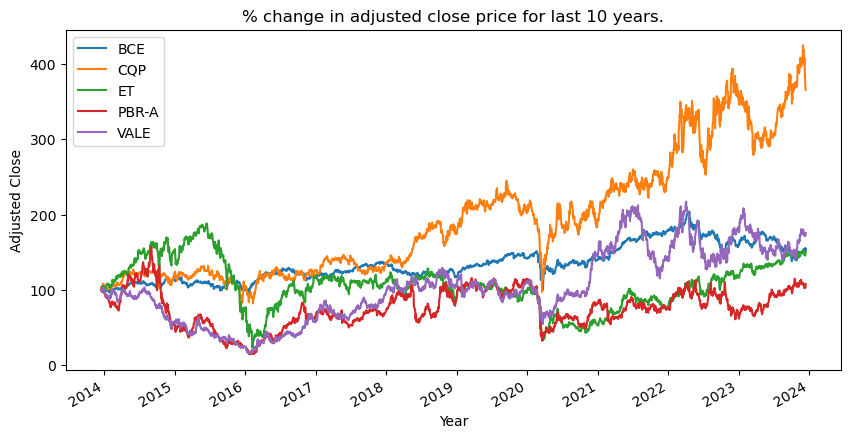

In [10]:
(td / td.iloc[0] * 100).plot(figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.title("% change in adjusted close price for last 10 years.")

In [73]:
log_returns = np.log(td / td.shift(1))

In [74]:
log_returns.mean() * 250

BCE      0.040988
CQP      0.130252
ET       0.042188
PBR-A    0.004614
VALE     0.049611
dtype: float64

In [112]:
log_returns.cov() * 250

,BCE,CQP,ET,PBR-A,VALE
BCE,0.031797,0.019920,0.028200,0.040782,0.032314
CQP,0.019920,0.108918,0.070783,0.062996,0.045524
ET,0.028200,0.070783,0.231885,0.104934,0.079515
PBR-A,0.040782,0.062996,0.104934,0.350578,0.169203
VALE,0.032314,0.045524,0.079515,0.169203,0.232826


In [76]:
log_returns.corr()

,BCE,CQP,ET,PBR-A,VALE
BCE,1.000000,0.338494,0.328419,0.386260,0.375567
CQP,0.338494,1.000000,0.445391,0.322381,0.285876
ET,0.328419,0.445391,1.000000,0.368033,0.342215
PBR-A,0.386260,0.322381,0.368033,1.000000,0.592242
VALE,0.375567,0.285876,0.342215,0.592242,1.000000


In [77]:
num_assets = len(ticker)
num_assets

5

In [78]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.45832577, 0.04663223, 0.29409425, 0.03811081, 0.16283694])

In [79]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

In [80]:
#Expected Portfolio Return:
np.sum(weights * log_returns.mean()) * 250

0.04552157236995171

In [81]:
#Expected Portfolio Variance:
np.dot(weights.T, 
       np.dot(log_returns.cov() * 250, weights))

0.06328185915588418

In [82]:
#Expected Portfolio Volatility:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.25155885823378227

In [83]:
pf_returns = []
pf_volatilities = []
pf_weights = []

In [84]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_weights.append(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities, pf_weights

([0.05835477508025893,
  0.043980219585970384,
  0.05562989197704753,
  0.04120587445455031,
  0.05469998074850575,
  0.05072056933905426,
  0.05635513623799545,
  0.028625015681493608,
  0.05418730917643218,
  0.062034150026022784,
  0.05770354712863678,
  0.04151962328845611,
  0.04838511783577873,
  0.08218394606556984,
  0.06434453514279834,
  0.05536472534705334,
  0.043613639121235254,
  0.04928964260338266,
  0.06619714930792053,
  0.02751913450405869,
  0.06536613992702932,
  0.04139563829962102,
  0.0511672584971804,
  0.04552056792561513,
  0.06379878643534125,
  0.07748800540278142,
  0.06126418320819483,
  0.06300632997969688,
  0.04854973604625803,
  0.032739732525969165,
  0.03774924937101324,
  0.0780817168374606,
  0.04545896879066934,
  0.04293099640221269,
  0.07427426401939942,
  0.04200801611956144,
  0.06761664767472508,
  0.056637108696562556,
  0.051416998431754644,
  0.048119404822029824,
  0.04012086136905495,
  0.0655007425346704,
  0.057656237788475596,
  0.0

In [85]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
pf_weights = np.array(pf_weights)

pf_returns, pf_volatilities, pf_weights

(array([0.05835478, 0.04398022, 0.05562989, 0.04120587, 0.05469998,
        0.05072057, 0.05635514, 0.02862502, 0.05418731, 0.06203415,
        0.05770355, 0.04151962, 0.04838512, 0.08218395, 0.06434454,
        0.05536473, 0.04361364, 0.04928964, 0.06619715, 0.02751913,
        0.06536614, 0.04139564, 0.05116726, 0.04552057, 0.06379879,
        0.07748801, 0.06126418, 0.06300633, 0.04854974, 0.03273973,
        0.03774925, 0.07808172, 0.04545897, 0.042931  , 0.07427426,
        0.04200802, 0.06761665, 0.05663711, 0.051417  , 0.0481194 ,
        0.04012086, 0.06550074, 0.05765624, 0.04750342, 0.04642214,
        0.04889181, 0.04822714, 0.04673576, 0.04066235, 0.05954137,
        0.032011  , 0.0378244 , 0.05055121, 0.05119141, 0.04355346,
        0.04746018, 0.05349624, 0.06252769, 0.05650118, 0.05871158,
        0.05193786, 0.05347233, 0.05333952, 0.03709161, 0.03827313,
        0.04468657, 0.06558737, 0.06839824, 0.05048694, 0.05438041,
        0.04610359, 0.0587415 , 0.04933139, 0.04

In [86]:
portfolios = ({'Return': pf_returns, 'Volatility': pf_volatilities})

for counter, symbol in enumerate(td.columns.tolist()):
    #print(counter, symbol)
    portfolios[symbol+' weight'] = [w[counter] for w in pf_weights]

In [87]:
portfolios = pd.DataFrame(portfolios)


In [88]:
portfolios.head()

,Return,Volatility,BCE weight,CQP weight,ET weight,PBR-A weight,VALE weight
0,0.058355,0.334917,0.082467,0.292646,0.118338,0.294824,0.211725
1,0.043980,0.335506,0.170377,0.053430,0.473682,0.110101,0.192409
2,0.055630,0.319197,0.171850,0.132514,0.198900,0.037983,0.458754
3,0.041206,0.350403,0.126526,0.108135,0.274727,0.311024,0.179587
4,0.054700,0.270952,0.308604,0.164931,0.162351,0.096568,0.267545


Text(0, 0.5, 'Expected Return')

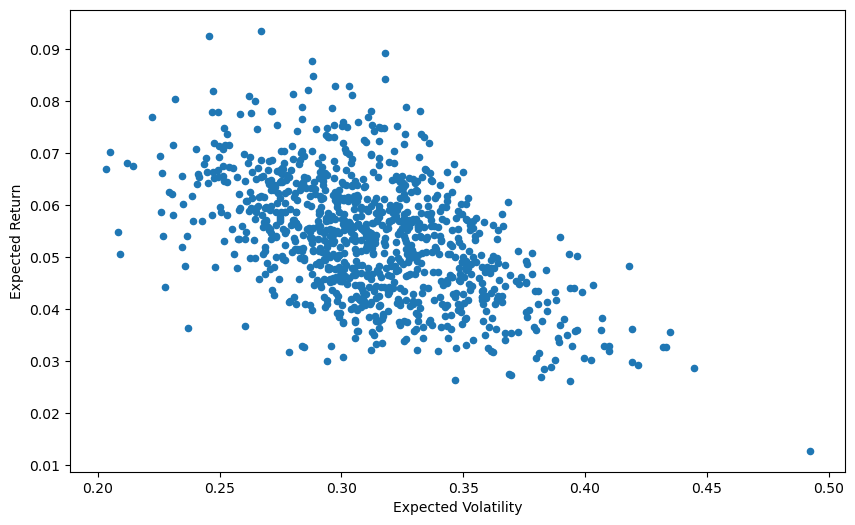

In [89]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [90]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]                             
min_vol_port

Return          0.066882
Volatility      0.203117
BCE weight      0.538230
CQP weight      0.281256
ET weight       0.031954
PBR-A weight    0.011817
VALE weight     0.136743
Name: 762, dtype: float64

In [91]:
max_vol_port = portfolios.iloc[portfolios['Return'].idxmax()]                               
max_vol_port

Return          0.093512
Volatility      0.266779
BCE weight      0.163302
CQP weight      0.582565
ET weight       0.101278
PBR-A weight    0.020392
VALE weight     0.132462
Name: 422, dtype: float64

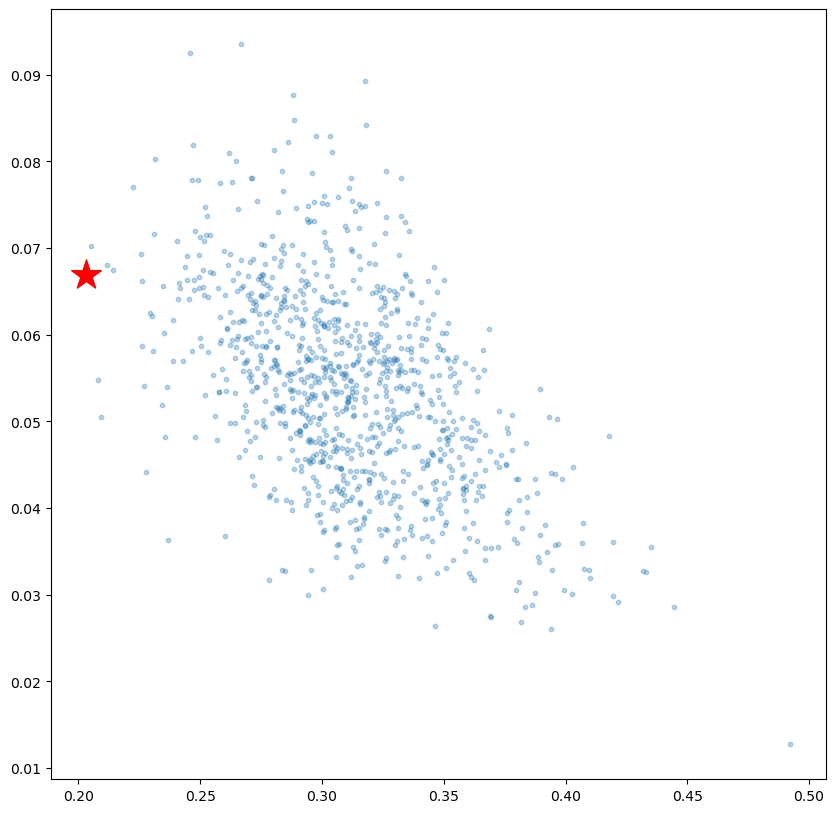

In [92]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Return'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.title("Plot for minimun volatility portfolio")

#### Finding the optimal portfolio - Sharpe Ratio

In [93]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Return']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Return          0.092457
Volatility      0.245805
BCE weight      0.299971
CQP weight      0.581577
ET weight       0.084176
PBR-A weight    0.018714
VALE weight     0.015562
Name: 559, dtype: float64

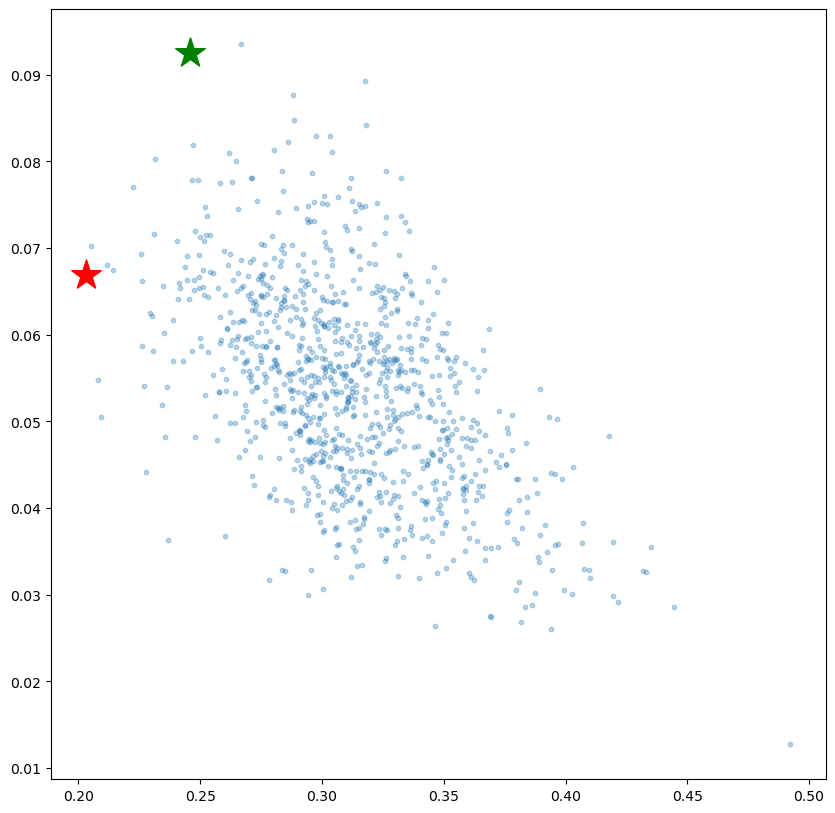

In [94]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Return'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

### Predicting future values using Monte Carlo Simulation

In [51]:
from scipy.stats import norm

In [95]:
predicted = {}

In [113]:
def monte_carlo_predict(data):
    log_returns = np.log(data/data.shift(1))
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (.5*var)
    stdev = log_returns.std()
    t_intervals = 2500
    iterations = 50
    x = np.random.rand(t_intervals, iterations)
    Z = norm.ppf(x)
    daily_returns = np.exp(drift + stdev * Z)
    S0 = data.iloc[-1]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    return(price_list.mean())

In [114]:
for i in td.columns:
    predicted[i] = round(monte_carlo_predict(td[i]),2)

In [115]:
predicted

{'BCE': 48.09, 'CQP': 104.46, 'ET': 15.59, 'PBR-A': 27.82, 'VALE': 31.09}